# **Auxiliary Functions**

In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

path = '/home/bboattini/Documents/active_drop_potts_C'
path = '/home/bernardo/Documentos/ACTIVE_WETTING/active_drop_potts_C'
items = os.listdir(path)

def a_from_file (File):
  fs = File.split("/")[-1].split("_")
  fl = len(fs)
  pad = int(fs[8].replace("", ""))
  return pad # return a value

def h_from_file (File):
  fs = File.split("/")[-1].split("_")
  fl = len(fs)
  pad = int(fs[10].replace("", ""))
  return pad # return h value

def state_from_file (File):
  fs = File.split("/")[-1].split("_")
  fl = len(fs)
  pad = fs[0].replace("/", "")
  return pad # return state value

def fo_from_file (File):
  fs = File.split("/")[-2].split("_")
  fl = len(fs)
  pad = fs[-1]
  return pad # return state value

def file_crawler(path):
    items = os.listdir(path)

    configuration_files = []
    last_configuration_files = []
    measures_files = []
    general_data_files = []
    for item in items:
        full_item_path = os.path.join(path, item)
        if os.path.isdir(full_item_path):
            if 'dados_' in item:
                # List the files inside this directory
                files = os.listdir(full_item_path)
                #print(files)
                for File in files:
                    if 'conf.dsf' in File:
                        configuration_files.append(os.path.join(full_item_path, File))
                    elif 'LAST.dsf' in File:
                        last_configuration_files.append(os.path.join(full_item_path, File))
                    elif '.out' in File:
                        general_data_files.append(os.path.join(full_item_path, File))
                    elif '.dsf' in File:
                        measures_files.append(os.path.join(full_item_path, File))
                    

    return {'config': configuration_files ,'last': last_configuration_files, 'measures': measures_files, 'general': general_data_files, }

/home/bernardo/.local/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/tmp/ipykernel_42717/3438818438.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [ ]:
def extract_parameters(conf_file):
    general_parameters = {'L':0,'R':0, 'V':0, 'Seed':0}
    with open(conf_file, 'r') as f:
        lines = f.readlines()
    f.close()
    for line in lines[:22]:
        if 'L' in line:
            general_parameters['L'] = int(line.split()[2])
        if 'R' in line:
            general_parameters['R'] = int(line.split()[2])
        if 'V_w' in line:
            general_parameters['V'] = int(line.split()[2])
        if 'Seed' in line:
            dt = float(line.split()[2])

# **Center of Mass**

## **Test CM Measure**

Function that tests the new Center of Mass measure using the configuration file

In [ ]:
path = '/home/bernardo/Documentos/ACTIVE_WETTING/active_drop_potts_C'

measures = file_crawler(path)['measures'][0]
t, V, Vw, Vo, E, bxw, byw, bxo,byo, rxw, ryw, rxo, ryo, txw, tyw,txo, tyo, npxw,npyw, npxo,npyo, vbw, vbo, vrw,vro, pw, po, fw, fo, vpw, vpo, xm_CM, ym_CM, zm_CM = np.loadtxt(measures, unpack=True)
print(measures)
# concertar
'''for f in file_crawler(path)['config']:
    l = 240
    interface = pd.DataFrame()
    site, spin = np.loadtxt(f, skiprows = 21, unpack=True)
    interface["site"] = site
    interface["spin"] = spin

    x_values = []
    y_values = []
    x_CM = []
    y_CM = []

    # Iterate over rows
    for site, spin in interface.itertuples(index=False):
        if np.isnan(site):
            # Calculate mean and add to x_CM and y_CM
            if x_values and y_values:  # Check if lists are not empty
                x_CM.append(np.mean(x_values))
                y_CM.append(np.mean(y_values))
                x_values.clear()
                y_values.clear()
        else:
            # Calculate x and y and add to x_values and y_values
            x = site % l
            y = (site / l) % l
            x_values.append(x)
            y_values.append(y)

    # Check if there are remaining values after the loop
    if x_values and y_values:
        x_CM.append(np.mean(x_values))
        y_CM.append(np.mean(y_values))'''

# Plot xm_CM over time
plt.plot(t, xm_CM, 'r-', label='x medida')

# Plot x_CM over time with a dashed line
# plt.plot(t, x_CM[1:], 'r--', label='x real')

# Plot xm_CM over time
plt.plot(t, ym_CM, 'b-', label='y medida')

# Plot x_CM over time with a dashed line
# plt.plot(t, y_CM[1:], 'b--', label='y real')

# Add labels and legend
plt.xlabel('Time')
plt.ylabel('Position')
plt.legend()

# Display the plot
plt.show()

## **CM Trajectories**
Function that measure CM displacement of y and x

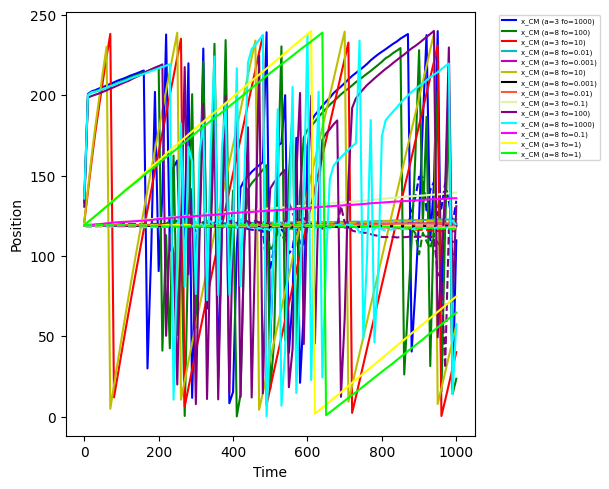

In [224]:
measures = file_crawler(path)['measures']
aux = 0
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', '#FF5733', '#DAF7A6', '#800080', '#00FFFF', '#FF00FF', '#FFFF00', '#00FF00', '#FF0000', '#00FF00', '#0000FF', '#FF00FF', '#00FFFF', '#FF5733']
plt.figure(figsize=(6, 5))
for m in measures[:]:
    t, V, Vw, Vo, E, bxw, byw, bxo,byo, rxw, ryw, rxo, ryo, txw, tyw,txo, tyo, npxw,npyw, npxo,npyo, vbw, vbo, vrw,vro, pw, po, fw, fo, vpw, vpo, xm_CM, ym_CM, zm_CM = np.loadtxt(m, unpack=True)
    
    # Get the value of a from the file
    a = a_from_file(m)
    fo = fo_from_file(m)

    # Define the color for the current m
    color = colors[aux]
    aux += 1

    if float(fo) < 100000:
        # Plot xm_CM over time with a label containing the value of a and the defined color
        plt.plot(t, xm_CM, label=f'x_CM (a={a} fo={fo})', color=color)

        # Plot ym_CM over time with a label containing the value of a, dashed line style, and the defined color
        # plt.plot(t, ym_CM, label=f'y_CM (a={a} fo={fo})', linestyle='--', color=color)
        plt.plot(t, ym_CM, linestyle='--', color=color)

# Add labels and legend
plt.xlabel('Time')
plt.ylabel('Position')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', prop={'size': 5})
# Create some space on the right side of the plot for the legend
plt.subplots_adjust(right=0.15)

# Display the plot
plt.tight_layout()
plt.savefig('trajectories.png', dpi=300)
plt.show()


    

The same plot but organizing the legends

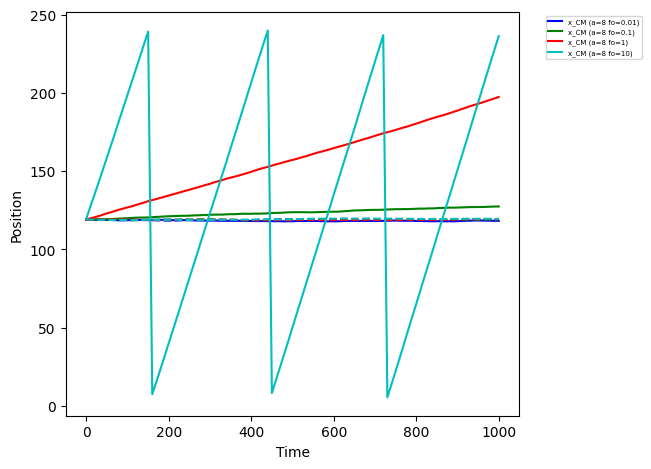

In [11]:
state = input("Digite o estado desejado: (WE/CB)")
aux = 0
files_to_read = [f for f in measures if f'{state}' in f]
h_values = np.sort(np.unique(np.array([h_from_file(f) for f in files_to_read])))
a_values = np.sort(np.unique(np.array([a_from_file(f) for f in files_to_read])))
fo_values = np.sort(np.unique(np.array([fo_from_file(f) for f in files_to_read])))

for fo_val in fo_values:
    for a_val in a_values:
        for h_val in h_values:
            m = [f for f in files_to_read if f'a_{a_val}' in f and f'h_{h_val}' in f and f'fo_{float(fo_val):.2f}.' in f][0]
            t, V, Vw, Vo, E, bxw, byw, bxo,byo, rxw, ryw, rxo, ryo, txw, tyw,txo, tyo, npxw,npyw, npxo,npyo, vbw, vbo, vrw,vro, pw, po, fw, fo, vpw, vpo, xm_CM, ym_CM, zm_CM = np.loadtxt(m, unpack=True)   
            # Get the value of a from the file
            a = a_from_file(m)
            fo = fo_from_file(m)
            
            # Define the color for the current m
    color = colors[aux]
    aux += 1

    if float(fo) < 100:
        # Plot xm_CM over time with a label containing the value of a and the defined color
        plt.plot(t, xm_CM, label=f'x_CM (a={a} fo={fo})', color=color)

        # Plot ym_CM over time with a label containing the value of a, dashed line style, and the defined color
        # plt.plot(t, ym_CM, label=f'y_CM (a={a} fo={fo})', linestyle='--', color=color)
        plt.plot(t, ym_CM, linestyle='--', color=color)

# Add labels and legend
plt.xlabel('Time')
plt.ylabel('Position')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', prop={'size': 5})
# Create some space on the right side of the plot for the legend
plt.subplots_adjust(right=0.15)

# Display the plot
plt.tight_layout()
plt.savefig('trajectories.png', dpi=300)
plt.show()

## **CM MSD**
Function that plot MSD

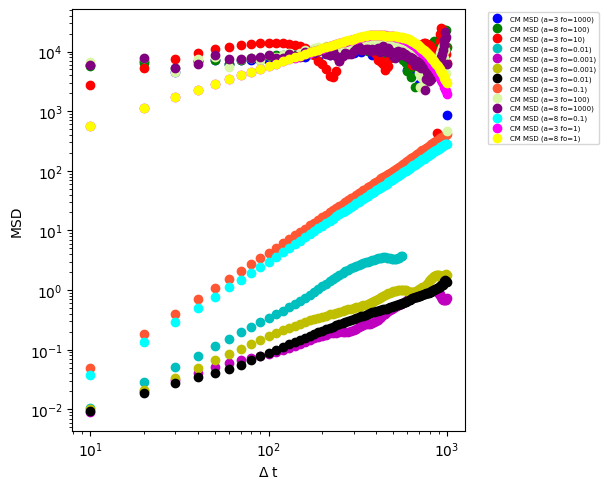

In [206]:
measures = file_crawler(path)['measures']
aux = 0
d_wind = 10
l = 240
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', '#FF5733', '#DAF7A6', '#800080', '#00FFFF', '#FF00FF', '#FFFF00', '#00FF00', '#FF0000', '#00FF00', '#0000FF', '#FF00FF', '#00FFFF', '#FF5733']

state = input("Digite o estado desejado: (WE/CB)")
files_to_read = [f for f in measures if f'{state}' in f]
h_values = np.sort(np.unique(np.array([h_from_file(f) for f in files_to_read])))
a_values = np.sort(np.unique(np.array([a_from_file(f) for f in files_to_read])))
fo_values = np.sort(np.unique(np.array([fo_from_file(f) for f in files_to_read])))

plt.figure(figsize=(6, 5))
for m in measures[:]:
    t, V, Vw, Vo, E, bxw, byw, bxo,byo, rxw, ryw, rxo, ryo, txw, tyw,txo, tyo, npxw,npyw, npxo,npyo, vbw, vbo, vrw,vro, pw, po, fw, fo, vpw, vpo, xm_CM, ym_CM, zm_CM = np.loadtxt(m, unpack=True)   
    # Get the value of a from the file
    a = a_from_file(m)
    fo = fo_from_file(m)
    
    # Resolve periodic boundary conditions
    l = 240
    xm_CM1 = xm_CM
    ym_CM1 = ym_CM
    xm_CM2 = xm_CM
    ym_CM2 = ym_CM
    phase = 1
    msd = np.array([])
    dt = np.array([])
    
    while phase < len(t)+1:
        # Calculate the CM MSD per window
        dx = xm_CM1[phase:] - xm_CM2[:-phase]
        dy = ym_CM1[phase:] - ym_CM2[:-phase]
        dr2 = dx**2 + dy**2
        msd = np.append(msd, np.mean(dr2))
        dt = np.append(dt, phase*d_wind)
        phase += 1

    # Define the color for the current m
    color = colors[aux]
    aux += 1
    if float(fo) < 110000:
        # Plot MSD over time with a label containing the value of a and the defined color
        plt.scatter(dt, msd, label=f'CM MSD (a={a} fo={fo})', color=color)
        plt.yscale("log")
        plt.xscale("log")

# Add labels and legend
plt.xlabel(r'$\Delta$ t')
plt.ylabel(r'MSD')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', prop={'size': 5})
# Create some space on the right side of the plot for the legend
plt.subplots_adjust(right=0.15)

# Display the plot
plt.tight_layout()
plt.savefig('MSD.png', dpi=300)
plt.show()



The same plot but organizing the legends

/home/bernardo/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/bernardo/.local/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


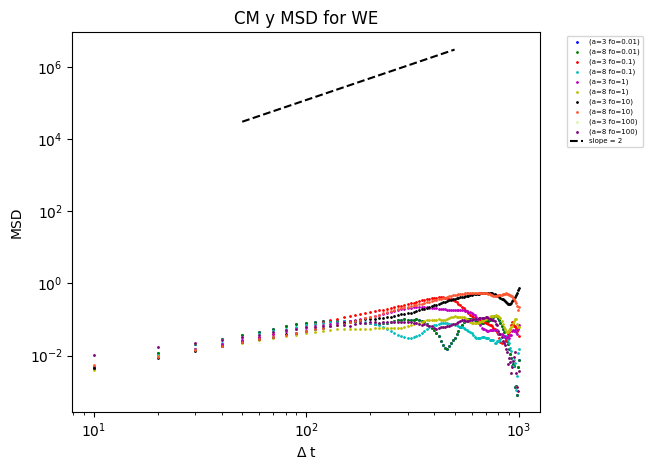

In [12]:
measures = file_crawler(path)['measures']
l = 300
aux = 0
d_wind = 10
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', '#FF5733', '#DAF7A6', '#800080', '#00FFFF', '#FF00FF', '#FFFF00', '#00FF00', '#FF0000', '#00FF00', '#0000FF', '#FF00FF', '#00FFFF', '#FF5733']

state = input("Digite o estado desejado: (WE/CB)")
limit = input("Digite o valor de fo que limita o plot: ")
files_to_read = [f for f in measures if f'{state}' in f]
h_values = np.sort(np.unique(np.array([h_from_file(f) for f in files_to_read])))
a_values = np.sort(np.unique(np.array([a_from_file(f) for f in files_to_read])))
fo_values = np.sort(np.unique(np.array([fo_from_file(f) for f in files_to_read])))

for h_val in h_values:
    for fo_val in fo_values:
        for a_val in a_values:
            m = [f for f in files_to_read if f'a_{a_val}' in f and f'h_{h_val}' in f and f'fo_{float(fo_val):.2f}.' in f][0]
            t, V, Vw, Vo, E, bxw, byw, bxo,byo, rxw, ryw, rxo, ryo, txw, tyw,txo, tyo, npxw,npyw, npxo,npyo, vbw, vbo, vrw,vro, pw, po, fw, fo, vpw, vpo, xm_CM, ym_CM, zm_CM = np.loadtxt(m, unpack=True)   
            # Get the value of a from the file
            a = a_val
            fo = fo_val
            
            # Resolve periodic boundary conditions
            l = 240

            for i in range(1,len(xm_CM)):
                if abs(xm_CM[i-1] - xm_CM[i]) > l/2:
                    xm_CM[i:] += l
                if abs(ym_CM[i-1] - ym_CM[i]) > l/2:
                    ym_CM[i:] += l
            xm_CM1 = xm_CM
            ym_CM1 = ym_CM
            xm_CM2 = xm_CM
            ym_CM2 = ym_CM
            phase = 1
            msd = np.array([])
            dt = np.array([])
            
            while phase < len(t)+1:
                # Calculate the CM MSD per window
                dx = xm_CM1[phase:] - xm_CM2[:-phase]
                dy = ym_CM1[phase:] - ym_CM2[:-phase]
                dr2 = dx**2 + dy**2
                msd = np.append(msd, np.mean(dr2))
                dt = np.append(dt, phase*d_wind)
                phase += 1

            if float(fo) < float(limit):
                # Define the color for the current m
                color = colors[aux]
                aux += 1
                # Plot MSD over time with a label containing the value of a and the defined color
                plt.scatter(dt, msd, label=f'(a={a} fo={fo})', color=color, s=1)

plt.yscale("log")
plt.xscale("log")

gide = np.arange(50, 500, 1)
plt.plot(gide, 12*gide*gide, 'k--', label='slope = 2')

# Add labels and legend
plt.title(f'CM MSD for {state}')
plt.xlabel(r'$\Delta$ t')
plt.ylabel(r'MSD')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', prop={'size': 5})
# Create some space on the right side of the plot for the legend
plt.subplots_adjust(right=0.15)

# Display the plot
plt.tight_layout()
plt.savefig('MSD.png', dpi=300)
plt.show()

# **Time Series**
Show WE and CB comparizon for a fixed **h** and **fo** time series

PS: contain the scatter plot diagram


Essas são as frorças possiveis:
	0.00



Essas são as alturas possiveis:
	8
	12
Angulo em x para WE a = 7:  136.51738056886225  +-  0.7129299056652866
Angulo em y para WE a = 7:  136.5750465768463  +-  0.7367478609509895
Angulo em x para WE a = 5:  144.88237300998003  +-  0.8355953052892668
Angulo em y para WE a = 5:  144.88220007784432  +-  0.7835047013421439
Angulo em x para CB a = 6:  143.59852561077844  +-  0.7443134148823424
Angulo em y para CB a = 6:  147.32837683433132  +-  0.8672533116888189
Angulo em x para CB a = 3:  136.58995361876248  +-  0.7497649137064116
Angulo em y para CB a = 3:  136.51182338323355  +-  0.7370075745603811
Angulo em x para WE a = 6:  143.64707189021956  +-  0.7001430881260003
Angulo em y para WE a = 6:  147.38778979041913  +-  0.8723066839545359
Angulo em x para WE a = 3:  136.6139427225549  +-  0.7141728507567572
Angulo em y para WE a = 3:  136.57087592814372  +-  0.7275586675059835
Angulo em x para WE a = 8:  125.04102366267466  +-  0.6803706046506738
Angulo em y para WE a = 8:  125.0689103

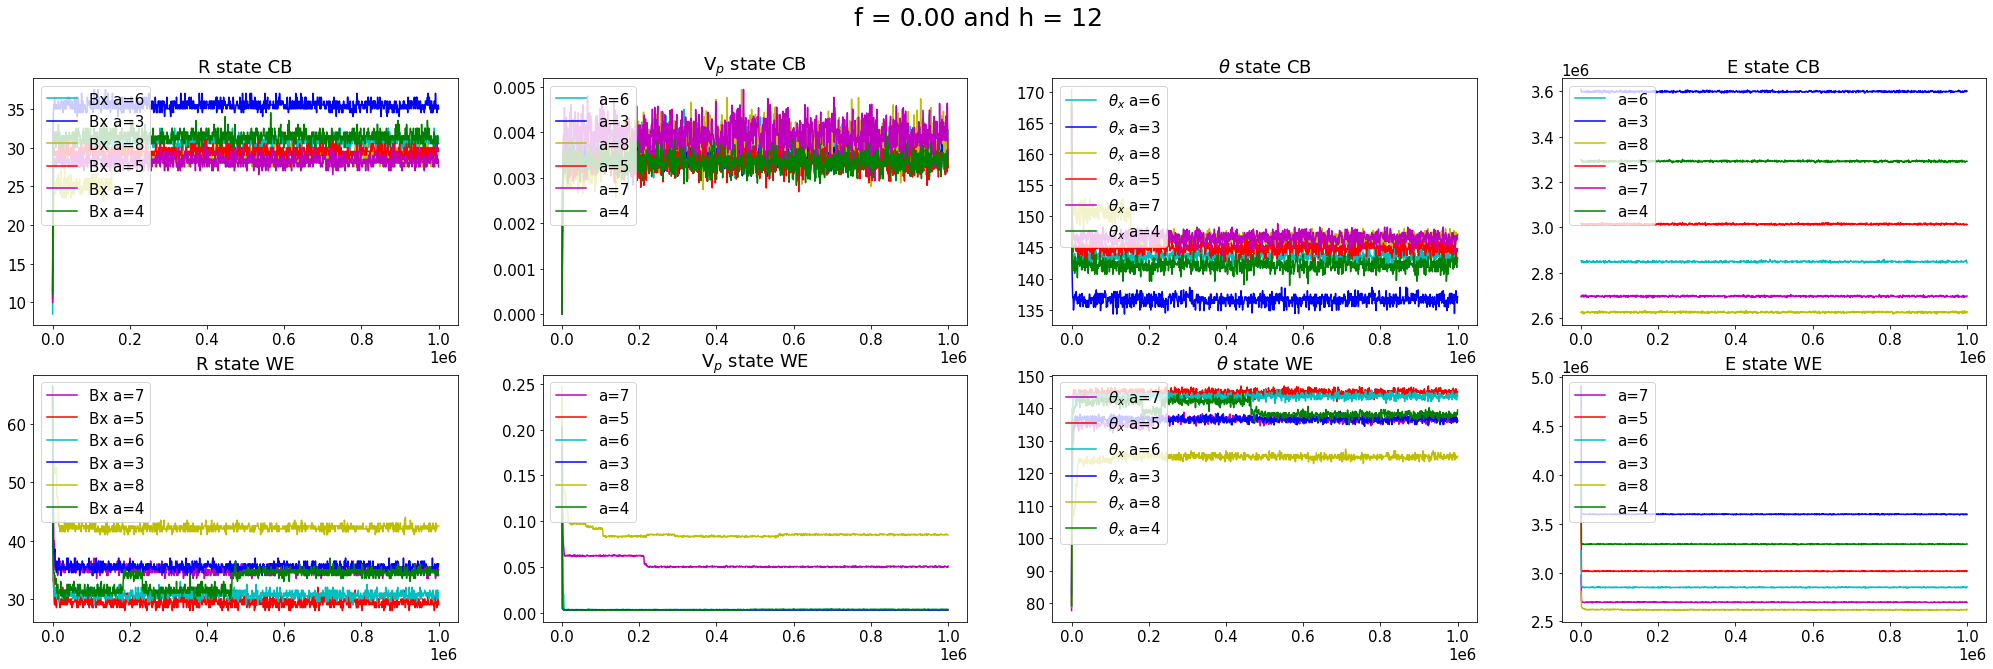

In [9]:
file_dict = file_crawler('/home/bboattini/Documents/Dados/Cluster/lamb_10-2_data_15_12_2023')['measures']
#--------------------------------------------------------------------------------------
#Escolha dos arquivos
print("\nEssas são as frorças possiveis:")
alpha_list = []
for alpha in file_dict:
  alpha_list.append(float(alpha.split("/")[-1].split("_")[14].replace(".dsf", "")))
for alpha in np.unique(np.array(alpha_list)):
  print(f'\t{alpha:.2f}')
alpha = input("Digite o valor desejado por inteiro:")

print("\nEssas são as alturas possiveis:")
lamb_list = []
for lamb in file_dict:
  lamb_list.append(h_from_file(lamb))
for lamb in np.unique(np.array(lamb_list)):
  print(f'\t{lamb}')
lamb = input("Digite o valor desejado por inteiro:")

files_to_read = [f for f in file_dict if f'h_{lamb}' in f]
files_to_read = [f for f in files_to_read if f'fo_{alpha}' in f]
j = 0
#--------------------------------------------------------------------------------------
#Inicia a figura
fig = plt.figure(figsize=(35,10))
h = h_from_file(files_to_read[0])
force = files_to_read[0].split("_")[32].replace(".dsf", "")
fig.suptitle('f = '+ force + ' and h = ' + str(h), fontsize=25)

plt.rcParams['font.size'] = '15'
colors = ['b','b','b','b', 'g', 'r', 'c', 'm', 'y', 'k', 'w', '#FF5733', '#DAF7A6']
#Angulo = np.empty((0, 4))
Volume = []
espaco = []
altura = []
log = input("\nDeseja printar os dados? Se sim, escolha qual tipo: (CB/WE)")
for f in files_to_read:
  #Loop de geração de gráficos
  t, V, Vw, Vo, E, bxw, byw, bxo,byo, rxw, ryw, rxo, ryo, txw, tyw,txo, tyo, npxw,npyw, npxo,npyo, vbw, vbo, vrw,vro, pw, po, fw, fo, vpw, vpo, xm_CM, ym_CM, zm_CM = np.loadtxt(f, unpack=True)
  
  state = state_from_file(f)
  N = 1
  if state == 'WE':
    N = 5
  
  a = a_from_file(f)
  #================================GEOMETRIA================================
  plt.subplot(2,4,N)
  plt.plot(t ,bxw ,'-' ,c = colors[int(a)], label="Bx a="+str(a))
  #plt.plot(t ,byw ,'--' ,c = colors[int(a)], label="By Water a="+str(a))
  plt.legend(loc="upper left")
  plt.title(f'R state {state_from_file(f)}')
  if log == 'CB' or log == 'WE':
    print(f"Angulo em x para {state} a = {a}: ", np.mean(txw[int(len(txw)/2):]), " +- ", np.std(txw[int(len(txw)/2):]))
    print(f"Angulo em y para {state} a = {a}: ", np.mean(tyw[int(len(tyw)/2):]), " +- ", np.std(tyw[int(len(tyw)/2):]))
    if state == log:
      if state == 'CB':
        est = 0
      else:
        est = 1
      Angulo = np.vstack((Angulo, [h, a, est, round(np.mean(txw[int(len(txw)/2):]), 2)]))
      Volume.append(round(np.mean(vbw[int(len(vbw)/2):]), 2))
      espaco.append(int(a))
      altura.append(int(h))
  #print()
  #================================VOLUME ABAIXO============================
  plt.subplot(2,4,N+1)
  plt.plot(t ,vbw ,'-' ,c = colors[int(a)], label="a="+str(a))
  plt.legend(loc="upper left")
  plt.title(r'V$_{p}$ state '+str(state_from_file(f)))
  #================================ANGULO================================
  plt.subplot(2,4,N+2)
  plt.plot(t ,txw ,'-' ,c = colors[int(a)], label=r"$\theta _x$ a="+str(a))
  #plt.plot(t ,tyw ,'--' ,c = colors[int(a)], label="$\theta _y$ a="+str(a))
  plt.legend(loc="upper left")
  plt.title(r'$\theta$ state ' + str(state_from_file(f)))
  #================================ENERGIA================================
  plt.subplot(2,4,N+3)
  plt.plot(t,E,c = colors[int(a)], label="a="+str(a))
  plt.legend(loc="upper left")
  plt.title(f'E state {state_from_file(f)}')


#fig.savefig(f"force{lamb}.jpg", format='jpeg')
fig.savefig(f"h_{lamb}_f{alpha}.jpg", format='jpeg')
if log == 'CB' or log == 'WE':
  print("Angulo")
  print(f"A = {Angulo[:,3]}")
  print("Volume")
  print(f"Vp = {Volume}")
  print("Espaco")
  print(f"a = {espaco}")
  print("Altura")
  print(f"h = {altura}")

## Sactter Plot

In [10]:
print(Angulo)

[[  8.     4.     1.   137.92]
 [  8.     8.     1.   117.19]
 [  8.     7.     1.   129.62]
 [  8.     6.     1.   134.1 ]
 [  8.     3.     1.   136.58]
 [  8.     5.     1.   143.28]
 [  8.     3.     0.   136.61]
 [  8.     5.     0.   144.93]
 [  8.     7.     0.   146.62]
 [  8.     6.     0.   143.64]
 [  8.     4.     0.   141.36]
 [  8.     8.     0.   150.3 ]
 [ 12.     6.     0.   143.6 ]
 [ 12.     3.     0.   136.59]
 [ 12.     8.     0.   146.34]
 [ 12.     5.     0.   144.9 ]
 [ 12.     7.     0.   146.59]
 [ 12.     4.     0.   142.15]
 [ 12.     7.     1.   136.52]
 [ 12.     5.     1.   144.88]
 [ 12.     6.     1.   143.65]
 [ 12.     3.     1.   136.61]
 [ 12.     8.     1.   125.04]
 [ 12.     4.     1.   138.03]]


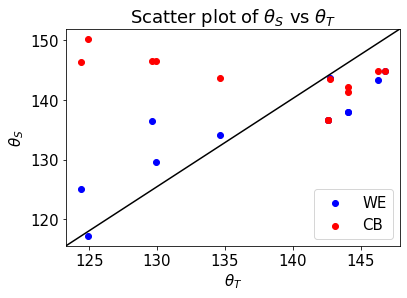

In [22]:
'''
É nescessário rodar a celula anterior para todas 
as configurações desejadas, para gerar a matriz Angulo

Angulo[i,j] = |h a theta|
              |         |
              |         |
'''
arquivo= 'est_estaveis'

# Load the data from the file
a, h, est, E, Th, Phi = np.loadtxt(arquivo, unpack=True)

# Create the dataframe
T_Angulo_df = pd.DataFrame({'a': a, 'h': h, 'estado_T': est, 'theta_T': Th})
S_Angulo_df = pd.DataFrame(Angulo, columns=['h', 'a','estado', 'theta_S'])

merged_df = pd.merge(S_Angulo_df, T_Angulo_df, on=['h', 'a'])
#print(merged_df[["theta_T","theta_S","estado"]])

# Create a color map for the 'estado' column
colors = {1: 'b', 0: 'r'}  # 1 is mapped to red and 0 is mapped to blue

# Create a scatter plot for estado == 1
plt.scatter(merged_df['theta_T'][merged_df['estado'] == 1], merged_df['theta_S'][merged_df['estado'] == 1], c='b', label='WE')

# Create a scatter plot for estado == 0
plt.scatter(merged_df['theta_T'][merged_df['estado'] == 0], merged_df['theta_S'][merged_df['estado'] == 0], c='r', label='CB')

# Add a bisecting line
plt.plot([0, 1], [0, 1], transform=plt.gca().transAxes, color='black')

# Set the labels and title
plt.ylabel(r'$\theta_S$')
plt.xlabel(r'$\theta_T$')
plt.title(r'Scatter plot of $\theta_S$ vs $\theta_T$')
plt.legend()

# Save the plot as a jpg file
plt.savefig('scatter.jpg', format='jpg')

# Show the plot
plt.show()


# **Vizualization**

## Side View
Show the final vertical section for a fixed initial state varing to parameters: h, a or fo

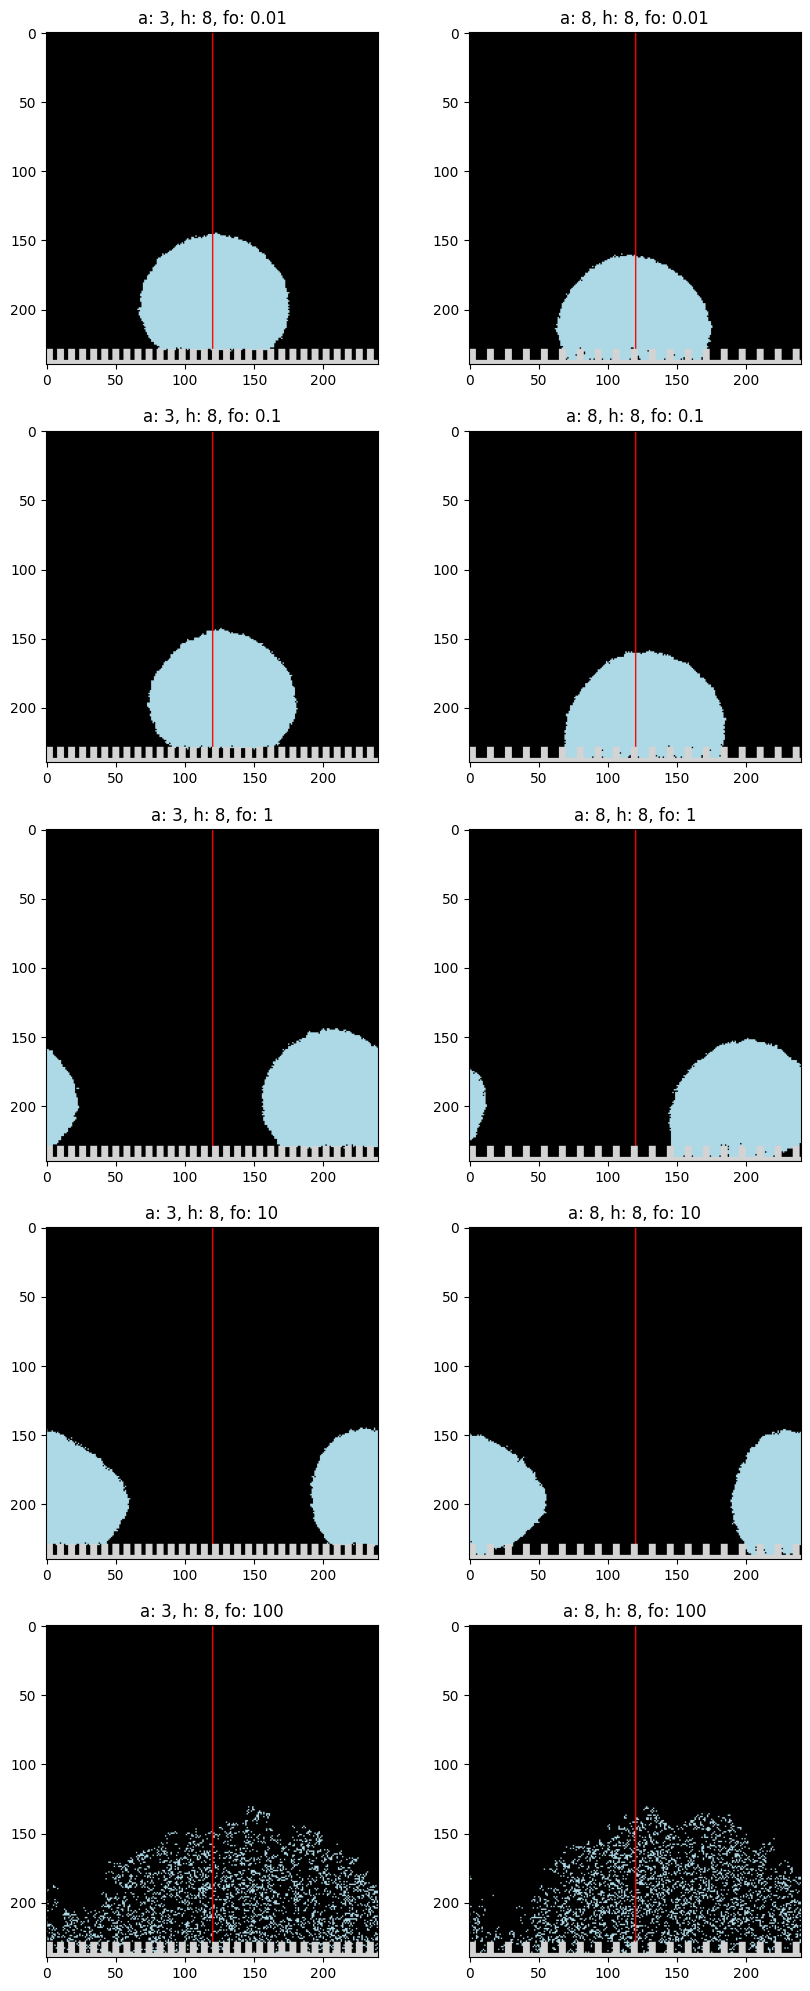

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Define the colors
light_blue = [173, 216, 230]  # RGB values for light blue
light_grey = [211, 211, 211]  # RGB values for light grey
red = [255, 0, 0]  # RGB values for red


# Define the size of the lattice
l = 240  # adjust this value as needed
l2 = l*l
w = 5
y = 120
h_base = 3

state = input("Digite o estado desejado: (WE/CB)")
file_dict = file_crawler(path)['last']
files_to_read = [f for f in file_dict if f'{state}' in f]

# Sort the h_values list from lower to greater
h_values = np.sort(np.unique(np.array([h_from_file(f) for f in files_to_read])))
a_values = np.sort(np.unique(np.array([a_from_file(f) for f in files_to_read])))
fo_values = np.sort(np.unique(np.array([fo_from_file(f) for f in files_to_read])))

vert = input("O que deseja variar na vertical? (h ou a ou fo)")
if vert == 'h':
    vertical = h_values
elif vert == 'a':
    vertical = a_values
else:
    vertical = fo_values

hori = input("O que deseja variar na horizontal? (h ou a ou fo)")
if hori == 'h':
    horizontal = h_values
elif hori == 'a':
    horizontal = a_values
else:
    horizontal = fo_values

# Create a subplot with 2 rows and 6 columns
fig, axs = plt.subplots(len(vertical), len(horizontal), figsize=(int(len(horizontal)*5), int(len(vertical)*5)))

for i, file in enumerate(file_dict):
    # Get the values of a and h from the file
    if vert == 'h':
        vert_index = h_from_file(file)
    elif vert == 'a':        
        vert_index = a_from_file(file)
    else:
        vert_index = fo_from_file(file)
    
    if hori == 'h':
        hori_index = h_from_file(file)
    elif hori == 'a':
        hori_index = a_from_file(file)
    else:
        hori_index = fo_from_file(file)
    
    h = h_from_file(file)
    a = a_from_file(file)

    # Find the corresponding subplot
    #Row = np.where(h_values == h)[0][0]
    #Col = np.where(a_values == a)[0][0]
    Row = vertical.tolist().index(vert_index)
    Col = horizontal.tolist().index(hori_index)

    # Create an empty image
    image = np.zeros((l, l, 3), dtype=np.uint8)

    # Iterate over the range
    for z in range(h + h_base):
        for x in range(l):
            site = z*l2 + y*l + x
            #if z < h_base or (x % (w + a) < w and y % (w + a) < w):
            if z < h_base or (x % (w + a) < w):
                image[x, z] = light_grey  # add a gray pixel
    
    # Read the file using numpy
    data = np.loadtxt(file, skiprows=1, dtype=int)

    # Iterate over the data
    for row in data:
        site, spin = row
        x = site % l
        y = (site // l) % l
        z = site // (l * l)
        if y == 120:  # adjust this value as needed
            if spin == 1:
                image[x, z] = light_blue
            elif spin == 2:
                image[x, z] = light_grey
    
    for z in range(h + h_base, l):
        image[120, z] = red

    # Rotate the image 90° anti-clockwise
    rotated_image = np.rot90(image, k=1, axes=(0, 1))
    # Display the rotated image in the corresponding subplot
    axs[Row, Col].imshow(rotated_image)
    axs[Row, Col].set_title(f'a: {a}, h: {h}, fo: {fo_from_file(file)}')

# Save the figure as a JPEG file
fig.savefig(f"{state}diagram_{vert}-vs-{hori}.jpg", format='jpeg')


## Base View

0) h=8 a=8 fo=100
1) h=8 a=3 fo=10
2) h=8 a=8 fo=0.01
3) h=8 a=8 fo=10
4) h=8 a=3 fo=0.01
5) h=8 a=3 fo=0.1
6) h=8 a=3 fo=100
7) h=8 a=8 fo=0.1
8) h=8 a=3 fo=1
9) h=8 a=8 fo=1


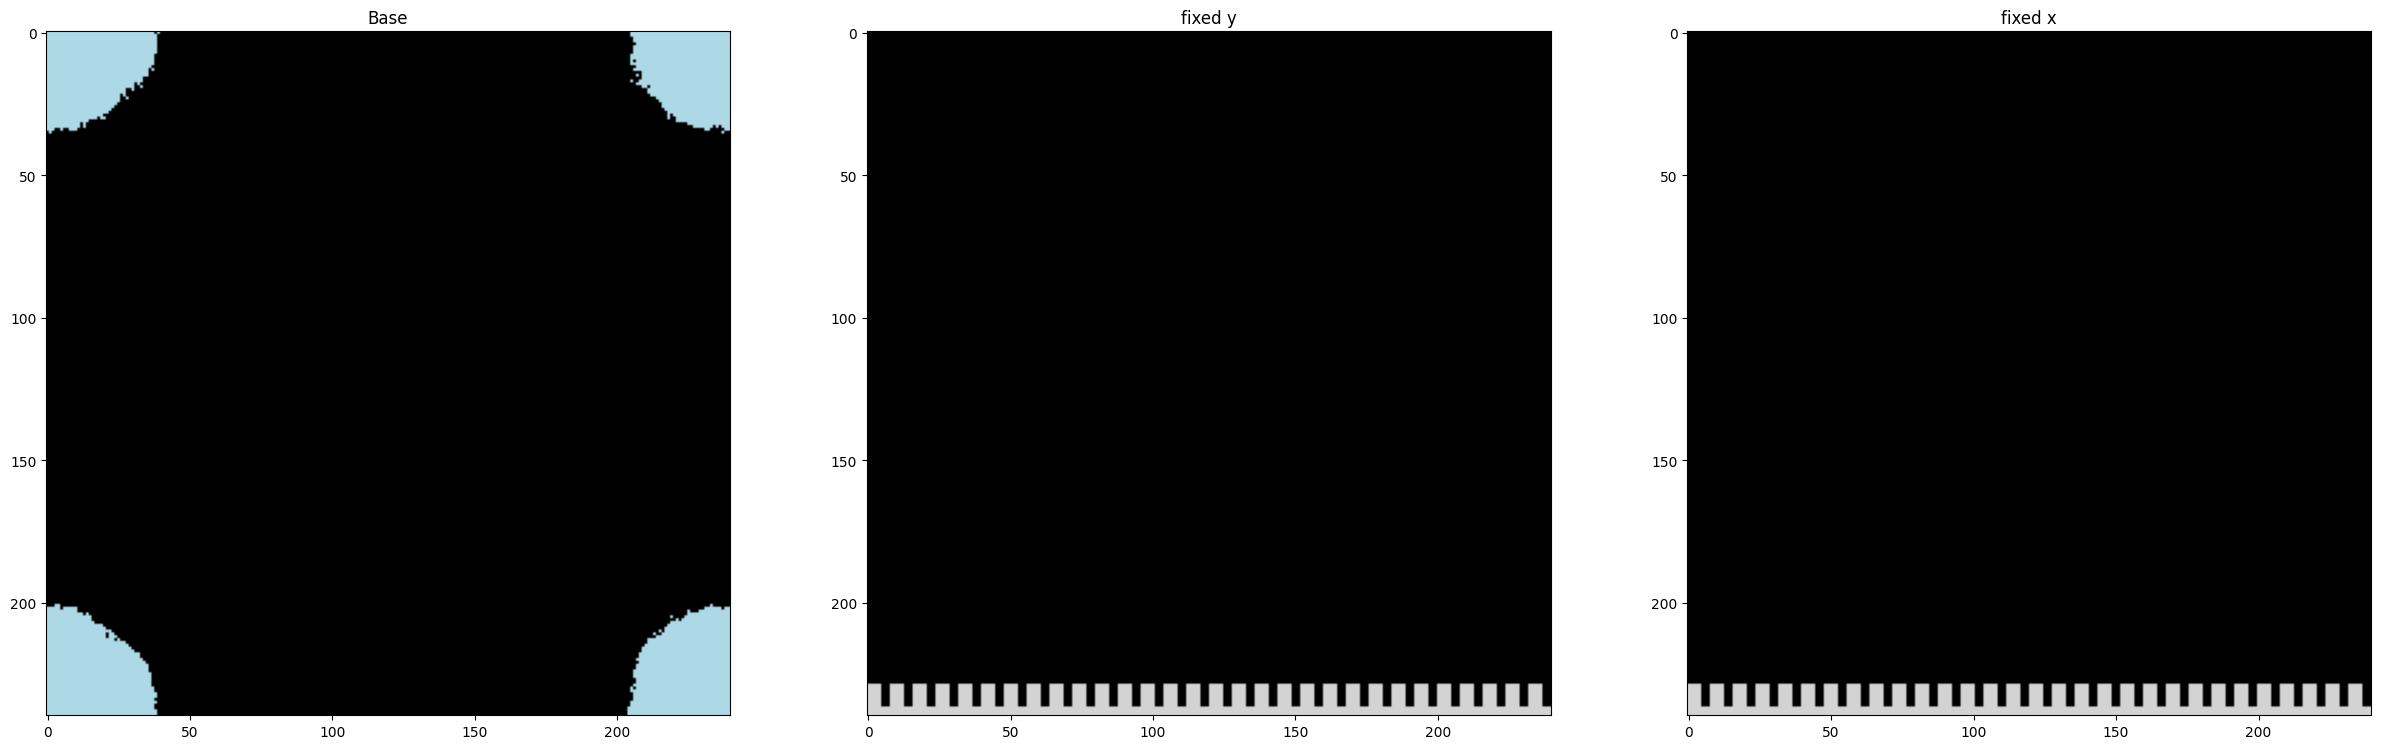

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Define the colors
light_blue = [173, 216, 230]  # RGB values for light blue
light_grey = [211, 211, 211]  # RGB values for light grey

# Define the size of the lattice
l = 240  # adjust this value as needed
l2 = l*l
w = 5
h_base = 3

state = input("Digite o estado desejado: (WE/CB)")
file_dict = file_crawler(path)['last']
files_to_read = [f for f in file_dict if f'{state}' in f]

# Create a subplot with 2 rows and 6 columns
fig, axs = plt.subplots(1, 3, figsize=(30, 10))

for i in range(len(file_dict)):
    print(f"{i}) h={h_from_file(file_dict[i])} a={a_from_file(file_dict[i])} fo={fo_from_file(file_dict[i])}")

file_index = input("Digite o número do arquivo que deseja visualizar: ")

file = file_dict[int(file_index)]
plt.title(f"h")
# Get the values of a and h from the file
a = a_from_file(file)
h = h_from_file(file)
fo = fo_from_file(file)
plt.title(f"h={h} a={a} fo={fo} {state}")

# Create an empty image
base = np.zeros((l, l, 3), dtype=np.uint8)
y_fix = np.zeros((l, l, 3), dtype=np.uint8)
x_fix = np.zeros((l, l, 3), dtype=np.uint8)

y = 120
# Iterate over the range
for z in range(h + h_base):
    for x in range(l):
        site = z*l2 + y*l + x
        #if z < h_base or (x % (w + a) < w and y % (w + a) < w):
        if z < h_base or (x % (w + a) < w):
            y_fix[x, z] = light_grey  # add a gray pixel
            x_fix[x, z] = light_grey

# Read the file using numpy
data = np.loadtxt(file, skiprows=1, dtype=int)

# Iterate over the data
for row in data:
    site, spin = row
    x = site % l
    y = (site // l) % l
    z = site // (l * l)
    if x == 120:  # adjust this value as needed
        if spin == 1:
            x_fix[y, z] = light_blue
    if y == 120:  # adjust this value as needed
        if spin == 1:
            y_fix[x, z] = light_blue
    if z == h + h_base + 2 :  # adjust this value as needed
        if spin == 1:
            base[x, y] = light_blue

# Rotate the image 90° anti-clockwise
rotated_image = np.rot90(base, k=1, axes=(0, 1))
# Display the rotated image in the corresponding subplot
axs[0].imshow(rotated_image)
axs[0].set_title(f'Base')

# Rotate the image 90° anti-clockwise
rotated_image = np.rot90(y_fix, k=1, axes=(0, 1))
# Display the rotated image in the corresponding subplot
axs[1].imshow(rotated_image)
axs[1].set_title(f'fixed y')

# Rotate the image 90° anti-clockwise
rotated_image = np.rot90(x_fix, k=1, axes=(0, 1))
# Display the rotated image in the corresponding subplot
axs[2].imshow(rotated_image)
axs[2].set_title(f'fixed x')

# Save the figure as a JPEG file
fig.savefig(f"{state}BaseView.jpg", format='jpeg')

0) h=8 a=8 fo=100
1) h=8 a=3 fo=10
2) h=8 a=8 fo=0.01
3) h=8 a=8 fo=10
4) h=8 a=3 fo=0.01
5) h=8 a=3 fo=0.1
6) h=8 a=3 fo=100
7) h=8 a=8 fo=0.1
8) h=8 a=3 fo=1
9) h=8 a=8 fo=1


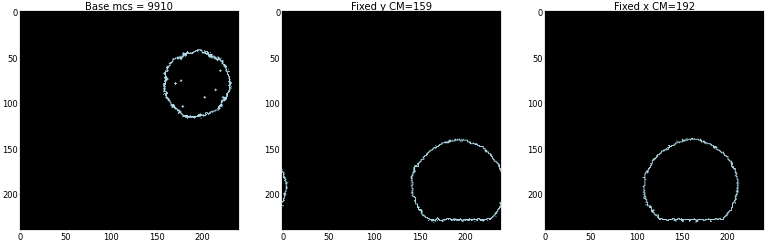

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import islice
import os

# Define the colors
light_blue = [173, 216, 230]  # RGB values for light blue
light_grey = [211, 211, 211]  # RGB values for light grey

# Define the size of the lattice
l = 240  # adjust this value as needed
l2 = l*l
w = 5
h_base = 3

state = input("Digite o estado desejado: (WE/CB)")
config_dict = file_crawler(path)['config']
files_to_read = [f for f in config_dict if f'{state}' in f]
config_dict = files_to_read

# Create a subplot with 2 rows and 6 columns
fig, axs = plt.subplots(1, 3, figsize=(48, 16), dpi = 20)
plt.rcParams.update({'font.size': 30})

axs[0].set_title(f'Base')
axs[1].set_title(f'Fixed y')
axs[2].set_title(f'Fixed x')

for i in range(len(config_dict)):
    print(f"{i}) h={h_from_file(config_dict[i])} a={a_from_file(config_dict[i])} fo={fo_from_file(config_dict[i])}")

file_index = input("Digite o número do arquivo que deseja visualizar: ")

measures_dict = file_crawler(path)['measures']
measure_file = measures_dict[int(file_index)]
t, V, Vw, Vo, E, bxw, byw, bxo,byo, rxw, ryw, rxo, ryo, txw, tyw,txo, tyo, npxw,npyw, npxo,npyo, vbw, vbo, vrw,vro, pw, po, fw, fo, vpw, vpo, xm_CM, ym_CM, zm_CM = np.loadtxt(measure_file, unpack=True)

file = config_dict[int(file_index)]

# Get the values of a and h from the file
a = a_from_file(file)
h = h_from_file(file)
fo = fo_from_file(file)
plt.suptitle(f"h={h} a={a} fo={fo} {state}")

#Create movie folder inside the current working directory
movie_path = os.getcwd() + f"/movie_h{h}_a{a}_fo{fo}"
if not os.path.exists(movie_path):
    os.makedirs(movie_path)

# Create an empty image
base = np.zeros((l, l, 3), dtype=np.uint8)
y_fix = np.zeros((l, l, 3), dtype=np.uint8)
x_fix = np.zeros((l, l, 3), dtype=np.uint8)

y = ym_CM[-1]
# Iterate over the range
for z in range(h + h_base):
    for x in range(l):
        site = z*l2 + y*l + x
        #if z < h_base or (x % (w + a) < w and y % (w + a) < w):
        if z < h_base or (x % (w + a) < w):
            y_fix[x, z] = light_grey  # add a gray pixel
            x_fix[x, z] = light_grey

# Read the file using numpy
data = np.loadtxt(file, skiprows=1, dtype=int)
interval = 10
MAX = 1000
start_line = 20  # replace with the line number you want to start from
mcs = -2
with open(file, 'r') as data:
    for row in islice(data, start_line, None):
        if row.startswith("# tempo"):
            if mcs % interval == 0 and mcs > -1:
                # Rotate the image 90° anti-clockwise
                rotated_image = np.rot90(base, k=1, axes=(0, 1))
                # Display the rotated image in the corresponding subplot
                axs[0].imshow(rotated_image)
                axs[0].set_title(f'Base mcs = {row.split()[2]}')

                # Rotate the image 90° anti-clockwise
                rotated_image = np.rot90(y_fix, k=1, axes=(0, 1))
                # Display the rotated image in the corresponding subplot
                axs[1].imshow(rotated_image)
                axs[1].set_title(f'Fixed y CM={int(ym_CM[mcs])}')

                # Rotate the image 90° anti-clockwise
                rotated_image = np.rot90(x_fix, k=1, axes=(0, 1))
                # Display the rotated image in the corresponding subplot
                axs[2].imshow(rotated_image)
                axs[2].set_title(f'Fixed x CM={int(xm_CM[mcs])}')

                # Save the frame as a PNG file inside move folder
                fig.savefig(f"{movie_path}/{mcs}_frame.png", format='png')

                # Create an empty image
                base = np.zeros((l, l, 3), dtype=np.uint8)
                y_fix = np.zeros((l, l, 3), dtype=np.uint8)
                x_fix = np.zeros((l, l, 3), dtype=np.uint8)
            mcs += 1

        elif row.strip() and mcs%interval == 0:
            # Iterate over the data
            site, spin = map(int, row.split())
            x = site % l
            y = (site // l) % l
            z = site // (l * l)
            if x == int(xm_CM[mcs]):  # adjust this value as needed
                if spin == 1:
                    x_fix[y, z] = light_blue
            if y == int(ym_CM[mcs]):  # adjust this value as needed
                if spin == 1:
                    y_fix[x, z] = light_blue
            if z == h + h_base + 2 :  # adjust this value as needed
                if spin == 1:
                    base[x, y] = light_blue
        if mcs == MAX:
            break

    

In [21]:
import imageio.v2 as imageio

fileList = []

#sorting the frames in the order of frame number
listdir = os.listdir(movie_path)
listdir.sort(key=lambda f: int(''.join(filter(str.isdigit, f))))

for file in listdir:
    if "frame" in file:
        complete_path = movie_path +"/"+ file
        fileList.append(complete_path)
movie = movie_path.split("/")[-1]
writer = imageio.get_writer(f"{movie}.mp4", fps=20)

for im in fileList:
    writer.append_data(imageio.imread(im))
writer.close()